## **HR Analyitcs with Logistic Regression & Stochastic Gradient Descent**

kaggle: https://www.kaggle.com/datasets/vjchoudhary7/hr-analytics-case-study


## **1. Problem Statement**
In a company with more than 4K, around 15% of employees leave the company every year. We want to find core reasons for the attrition. Also, we are interested in finding potential employees who are likely to leave the firm soon

## **2. Import & merge the datasets**



In [320]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt, seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)

In [321]:
pip install openpyxl

In [322]:
# Read 5 datasets for our analysis

# General data
general_data = pd.read_csv('/content/general_data.csv')

# survey data
manager_survey_data = pd.read_csv('/content/manager_survey_data.csv')
employee_survey_data = pd.read_csv('/content/employee_survey_data.csv')

# office entry/exit time
in_time = pd.read_csv('/content/in_time.csv')
out_time = pd.read_csv('/content/out_time.csv')

## data dictionary
data_dictionary = pd.read_excel('/content/data_dictionary.xlsx')

In [323]:
data_dictionary.replace(np.nan," ")

,Variable,Meaning,Levels
0,Age,Age of the employee,
1,Attrition,Whether the employee left in the previous year...,
2,BusinessTravel,How frequently the employees travelled for bus...,
3,Department,Department in company,
4,DistanceFromHome,Distance from home in kms,
5,Education,Education Level,1 'Below College'
6,,,2 'College'
7,,,3 'Bachelor'
8,,,4 'Master'
9,,,5 'Doctor'


In [324]:
general_data.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,1,Healthcare Representative,Married,131160,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,1,Research Scientist,Single,41890,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,4,Sales Executive,Married,193280,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,3,Human Resources,Married,83210,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,1,Sales Executive,Single,23420,4.0,Y,12,8,2,9.0,2,6,0,4


In [325]:
manager_survey_data.head()

,EmployeeID,JobInvolvement,PerformanceRating
0,1,3,3
1,2,2,4
2,3,3,3
3,4,2,3
4,5,3,3


In [326]:
employee_survey_data.head()

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,1,3.0,4.0,2.0
1,2,3.0,2.0,4.0
2,3,2.0,2.0,1.0
3,4,4.0,4.0,3.0
4,5,4.0,1.0,3.0


In [327]:
in_time

,Unnamed: 0,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-14,2015-01-15,2015-01-16,2015-01-19,2015-01-20,2015-01-21,2015-01-22,2015-01-23,2015-01-26,2015-01-27,2015-01-28,2015-01-29,2015-01-30,2015-02-02,2015-02-03,2015-02-04,2015-02-05,2015-02-06,2015-02-09,2015-02-10,2015-02-11,2015-02-12,2015-02-13,2015-02-16,2015-02-17,2015-02-18,2015-02-19,2015-02-20,2015-02-23,2015-02-24,2015-02-25,2015-02-26,2015-02-27,2015-03-02,2015-03-03,2015-03-04,2015-03-05,2015-03-06,2015-03-09,2015-03-10,2015-03-11,2015-03-12,2015-03-13,2015-03-16,2015-03-17,2015-03-18,2015-03-19,2015-03-20,2015-03-23,2015-03-24,2015-03-25,2015-03-26,2015-03-27,2015-03-30,2015-03-31,2015-04-01,2015-04-02,2015-04-03,2015-04-06,2015-04-07,2015-04-08,2015-04-09,2015-04-10,2015-04-13,2015-04-14,2015-04-15,2015-04-16,2015-04-17,2015-04-20,2015-04-21,2015-04-22,2015-04-23,2015-04-24,2015-04-27,2015-04-28,2015-04-29,2015-04-30,2015-05-01,2015-05-04,2015-05-05,2015-05-06,2015-05-07,2015-05-08,2015-05-11,2015-05-12,2015-05-13,2015-05-14,2015-05-15,2015-05-18,2015-05-19,2015-05-20,2015-05-21,2015-05-22,2015-05-25,2015-05-26,2015-05-27,2015-05-28,2015-05-29,2015-06-01,2015-06-02,2015-06-03,2015-06-04,2015-06-05,2015-06-08,2015-06-09,2015-06-10,2015-06-11,2015-06-12,2015-06-15,2015-06-16,2015-06-17,2015-06-18,2015-06-19,2015-06-22,2015-06-23,2015-06-24,2015-06-25,2015-06-26,2015-06-29,2015-06-30,2015-07-01,2015-07-02,2015-07-03,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,2015-07-13,2015-07-14,2015-07-15,2015-07-16,2015-07-17,2015-07-20,2015-07-21,2015-07-22,2015-07-23,2015-07-24,2015-07-27,2015-07-28,2015-07-29,2015-07-30,2015-07-31,2015-08-03,2015-08-04,2015-08-05,2015-08-06,2015-08-07,2015-08-10,2015-08-11,2015-08-12,2015-08-13,2015-08-14,2015-08-17,2015-08-18,2015-08-19,2015-08-20,2015-08-21,2015-08-24,2015-08-25,2015-08-26,2015-08-27,2015-08-28,2015-08-31,2015-09-01,2015-09-02,2015-09-03,2015-09-04,2015-09-07,2015-09-08,2015-09-09,2015-09-10,2015-09-11,2015-09-14,2015-09-15,2015-09-16,2015-09-17,2015-09-18,2015-09-21,2015-09-22,2015-09-23,2015-09-24,2015-09-25,2015-09-28,2015-09-29,2015-09-30,2015-10-01,2015-10-02,2015-10-05,2015-10-06,2015-10-07,2015-10-08,2015-10-09,2015-10-12,2015-10-13,2015-10-14,2015-10-15,2015-10-16,2015-10-19,2015-10-20,2015-10-21,2015-10-22,2015-10-23,2015-10-26,2015-10-27,2015-10-28,2015-10-29,2015-10-30,2015-11-02,2015-11-03,2015-11-04,2015-11-05,2015-11-06,2015-11-09,2015-11-10,2015-11-11,2015-11-12,2015-11-13,2015-11-16,2015-11-17,2015-11-18,2015-11-19,2015-11-20,2015-11-23,2015-11-24,2015-11-25,2015-11-26,2015-11-27,2015-11-30,2015-12-01,2015-12-02,2015-12-03,2015-12-04,2015-12-07,2015-12-08,2015-12-09,2015-12-10,2015-12-11,2015-12-14,2015-12-15,2015-12-16,2015-12-17,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,1,NaN,2015-01-02 09:43:45,2015-01-05 10:08:48,2015-01-06 09:54:26,2015-01-07 09:34:31,2015-01-08 09:51:09,2015-01-09 10:09:25,2015-01-12 09:42:53,2015-01-13 10:13:06,NaN,2015-01-15 10:01:24,2015-01-16 10:19:08,NaN,2015-01-20 09:50:34,2015-01-21 09:49:42,2015-01-22 09:47:45,2015-01-23 09:23:44,NaN,2015-01-27 09:50:37,2015-01-28 09:56:13,2015-01-29 09:53:47,2015-01-30 10:09:26,2015-02-02 09:38:43,2015-02-03 10:23:38,2015-02-04 09:48:37,2015-02-05 09:52:36,2015-02-06 09:53:23,2015-02-09 10:01:45,2015-02-10 10:14:18,2015-02-11 10:18:44,2015-02-12 10:10:35,2015-02-13 09:13:07,2015-02-16 10:14:02,2015-02-17 10:03:08,2015-02-18 10:23:06,NaN,2015-02-20 09:54:56,2015-02-23 09:46:59,2015-02-24 10:11:18,2015-02-25 09:52:36,2015-02-26 09:56:33,2015-02-27 09:58:46,2015-03-02 10:19:43,2015-03-03 10:08:37,2015-03-04 10:05:38,NaN,2015-03-06 09:55:53,2015-03-09 10:28:34,2015-03-10 09:47:30,2015-03-11 09:48:59,2015-03-12 10:10:51,2015-03-13 10:07:18,NaN,2015-03-17 10:05:22,2015-03-18 10:28:21,2015-03-19 10:01:52,2015-03-20 10:37:49,2015-03-23 10:11:19,2015-03-24 10:33:19,2015-03-25 09:41:35,NaN,2015-03-27 09:47:30,2

In [328]:
out_time

,Unnamed: 0,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-14,2015-01-15,2015-01-16,2015-01-19,2015-01-20,2015-01-21,2015-01-22,2015-01-23,2015-01-26,2015-01-27,2015-01-28,2015-01-29,2015-01-30,2015-02-02,2015-02-03,2015-02-04,2015-02-05,2015-02-06,2015-02-09,2015-02-10,2015-02-11,2015-02-12,2015-02-13,2015-02-16,2015-02-17,2015-02-18,2015-02-19,2015-02-20,2015-02-23,2015-02-24,2015-02-25,2015-02-26,2015-02-27,2015-03-02,2015-03-03,2015-03-04,2015-03-05,2015-03-06,2015-03-09,2015-03-10,2015-03-11,2015-03-12,2015-03-13,2015-03-16,2015-03-17,2015-03-18,2015-03-19,2015-03-20,2015-03-23,2015-03-24,2015-03-25,2015-03-26,2015-03-27,2015-03-30,2015-03-31,2015-04-01,2015-04-02,2015-04-03,2015-04-06,2015-04-07,2015-04-08,2015-04-09,2015-04-10,2015-04-13,2015-04-14,2015-04-15,2015-04-16,2015-04-17,2015-04-20,2015-04-21,2015-04-22,2015-04-23,2015-04-24,2015-04-27,2015-04-28,2015-04-29,2015-04-30,2015-05-01,2015-05-04,2015-05-05,2015-05-06,2015-05-07,2015-05-08,2015-05-11,2015-05-12,2015-05-13,2015-05-14,2015-05-15,2015-05-18,2015-05-19,2015-05-20,2015-05-21,2015-05-22,2015-05-25,2015-05-26,2015-05-27,2015-05-28,2015-05-29,2015-06-01,2015-06-02,2015-06-03,2015-06-04,2015-06-05,2015-06-08,2015-06-09,2015-06-10,2015-06-11,2015-06-12,2015-06-15,2015-06-16,2015-06-17,2015-06-18,2015-06-19,2015-06-22,2015-06-23,2015-06-24,2015-06-25,2015-06-26,2015-06-29,2015-06-30,2015-07-01,2015-07-02,2015-07-03,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,2015-07-13,2015-07-14,2015-07-15,2015-07-16,2015-07-17,2015-07-20,2015-07-21,2015-07-22,2015-07-23,2015-07-24,2015-07-27,2015-07-28,2015-07-29,2015-07-30,2015-07-31,2015-08-03,2015-08-04,2015-08-05,2015-08-06,2015-08-07,2015-08-10,2015-08-11,2015-08-12,2015-08-13,2015-08-14,2015-08-17,2015-08-18,2015-08-19,2015-08-20,2015-08-21,2015-08-24,2015-08-25,2015-08-26,2015-08-27,2015-08-28,2015-08-31,2015-09-01,2015-09-02,2015-09-03,2015-09-04,2015-09-07,2015-09-08,2015-09-09,2015-09-10,2015-09-11,2015-09-14,2015-09-15,2015-09-16,2015-09-17,2015-09-18,2015-09-21,2015-09-22,2015-09-23,2015-09-24,2015-09-25,2015-09-28,2015-09-29,2015-09-30,2015-10-01,2015-10-02,2015-10-05,2015-10-06,2015-10-07,2015-10-08,2015-10-09,2015-10-12,2015-10-13,2015-10-14,2015-10-15,2015-10-16,2015-10-19,2015-10-20,2015-10-21,2015-10-22,2015-10-23,2015-10-26,2015-10-27,2015-10-28,2015-10-29,2015-10-30,2015-11-02,2015-11-03,2015-11-04,2015-11-05,2015-11-06,2015-11-09,2015-11-10,2015-11-11,2015-11-12,2015-11-13,2015-11-16,2015-11-17,2015-11-18,2015-11-19,2015-11-20,2015-11-23,2015-11-24,2015-11-25,2015-11-26,2015-11-27,2015-11-30,2015-12-01,2015-12-02,2015-12-03,2015-12-04,2015-12-07,2015-12-08,2015-12-09,2015-12-10,2015-12-11,2015-12-14,2015-12-15,2015-12-16,2015-12-17,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,1,NaN,2015-01-02 16:56:15,2015-01-05 17:20:11,2015-01-06 17:19:05,2015-01-07 16:34:55,2015-01-08 17:08:32,2015-01-09 17:38:29,2015-01-12 16:58:39,2015-01-13 18:02:58,NaN,2015-01-15 17:22:13,2015-01-16 17:35:11,NaN,2015-01-20 16:37:07,2015-01-21 16:55:24,2015-01-22 16:50:47,2015-01-23 17:00:01,NaN,2015-01-27 17:28:22,2015-01-28 17:03:21,2015-01-29 17:18:36,2015-01-30 17:00:25,2015-02-02 16:32:49,2015-02-03 17:35:49,2015-02-04 17:24:56,2015-02-05 17:26:31,2015-02-06 17:21:35,2015-02-09 17:37:50,2015-02-10 17:30:20,2015-02-11 17:30:19,2015-02-12 17:36:42,2015-02-13 16:25:26,2015-02-16 17:50:23,2015-02-17 17:28:06,2015-02-18 18:13:29,NaN,2015-02-20 17:44:52,2015-02-23 17:13:27,2015-02-24 17:24:48,2015-02-25 17:27:37,2015-02-26 17:08:36,2015-02-27 17:21:55,2015-03-02 17:29:08,2015-03-03 16:54:12,2015-03-04 17:50:18,NaN,2015-03-06 17:44:47,2015-03-09 17:53:05,2015-03-10 16:42:53,2015-03-11 16:58:39,2015-03-12 17:15:39,2015-03-13 17:25:55,NaN,2015-03-17 17:00:16,2015-03-18 17:40:13,2015-03-19 17:52:44,2015-03-20 17:47:34,2015-03-23 17:48:18,2015-03-24 17:48:26,2015-03-25 17:08:19,NaN,2015-03-27 17:20:51,2

In [329]:
in_time.fillna(0,inplace=True)
out_time.fillna(0,inplace= True)

In [330]:
# Convert all columns(except unnamed:0 which is employee id)to datetime format using pandas.to_datetime
# coerce : in case of error during conversion, place NaN.
in_time.iloc[:,1:]= in_time.iloc[:,1:].apply(pd.to_datetime, errors='coerce')
out_time.iloc[:,1:] = out_time.iloc[:,1:].apply(pd.to_datetime, errors='coerce')

In [331]:
#join in_time and out_time in a single df total_time
total_time = pd.concat([in_time,out_time],axis=0)

In [332]:
total_time

,Unnamed: 0,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-14,2015-01-15,2015-01-16,2015-01-19,2015-01-20,2015-01-21,2015-01-22,2015-01-23,2015-01-26,2015-01-27,2015-01-28,2015-01-29,2015-01-30,2015-02-02,2015-02-03,2015-02-04,2015-02-05,2015-02-06,2015-02-09,2015-02-10,2015-02-11,2015-02-12,2015-02-13,2015-02-16,2015-02-17,2015-02-18,2015-02-19,2015-02-20,2015-02-23,2015-02-24,2015-02-25,2015-02-26,2015-02-27,2015-03-02,2015-03-03,2015-03-04,2015-03-05,2015-03-06,2015-03-09,2015-03-10,2015-03-11,2015-03-12,2015-03-13,2015-03-16,2015-03-17,2015-03-18,2015-03-19,2015-03-20,2015-03-23,2015-03-24,2015-03-25,2015-03-26,2015-03-27,2015-03-30,2015-03-31,2015-04-01,2015-04-02,2015-04-03,2015-04-06,2015-04-07,2015-04-08,2015-04-09,2015-04-10,2015-04-13,2015-04-14,2015-04-15,2015-04-16,2015-04-17,2015-04-20,2015-04-21,2015-04-22,2015-04-23,2015-04-24,2015-04-27,2015-04-28,2015-04-29,2015-04-30,2015-05-01,2015-05-04,2015-05-05,2015-05-06,2015-05-07,2015-05-08,2015-05-11,2015-05-12,2015-05-13,2015-05-14,2015-05-15,2015-05-18,2015-05-19,2015-05-20,2015-05-21,2015-05-22,2015-05-25,2015-05-26,2015-05-27,2015-05-28,2015-05-29,2015-06-01,2015-06-02,2015-06-03,2015-06-04,2015-06-05,2015-06-08,2015-06-09,2015-06-10,2015-06-11,2015-06-12,2015-06-15,2015-06-16,2015-06-17,2015-06-18,2015-06-19,2015-06-22,2015-06-23,2015-06-24,2015-06-25,2015-06-26,2015-06-29,2015-06-30,2015-07-01,2015-07-02,2015-07-03,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,2015-07-13,2015-07-14,2015-07-15,2015-07-16,2015-07-17,2015-07-20,2015-07-21,2015-07-22,2015-07-23,2015-07-24,2015-07-27,2015-07-28,2015-07-29,2015-07-30,2015-07-31,2015-08-03,2015-08-04,2015-08-05,2015-08-06,2015-08-07,2015-08-10,2015-08-11,2015-08-12,2015-08-13,2015-08-14,2015-08-17,2015-08-18,2015-08-19,2015-08-20,2015-08-21,2015-08-24,2015-08-25,2015-08-26,2015-08-27,2015-08-28,2015-08-31,2015-09-01,2015-09-02,2015-09-03,2015-09-04,2015-09-07,2015-09-08,2015-09-09,2015-09-10,2015-09-11,2015-09-14,2015-09-15,2015-09-16,2015-09-17,2015-09-18,2015-09-21,2015-09-22,2015-09-23,2015-09-24,2015-09-25,2015-09-28,2015-09-29,2015-09-30,2015-10-01,2015-10-02,2015-10-05,2015-10-06,2015-10-07,2015-10-08,2015-10-09,2015-10-12,2015-10-13,2015-10-14,2015-10-15,2015-10-16,2015-10-19,2015-10-20,2015-10-21,2015-10-22,2015-10-23,2015-10-26,2015-10-27,2015-10-28,2015-10-29,2015-10-30,2015-11-02,2015-11-03,2015-11-04,2015-11-05,2015-11-06,2015-11-09,2015-11-10,2015-11-11,2015-11-12,2015-11-13,2015-11-16,2015-11-17,2015-11-18,2015-11-19,2015-11-20,2015-11-23,2015-11-24,2015-11-25,2015-11-26,2015-11-27,2015-11-30,2015-12-01,2015-12-02,2015-12-03,2015-12-04,2015-12-07,2015-12-08,2015-12-09,2015-12-10,2015-12-11,2015-12-14,2015-12-15,2015-12-16,2015-12-17,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,1,1970-01-01,2015-01-02 09:43:45,2015-01-05 10:08:48,2015-01-06 09:54:26,2015-01-07 09:34:31,2015-01-08 09:51:09,2015-01-09 10:09:25,2015-01-12 09:42:53,2015-01-13 10:13:06,1970-01-01,2015-01-15 10:01:24,2015-01-16 10:19:08,1970-01-01 00:00:00,2015-01-20 09:50:34,2015-01-21 09:49:42,2015-01-22 09:47:45,2015-01-23 09:23:44,1970-01-01,2015-01-27 09:50:37,2015-01-28 09:56:13,2015-01-29 09:53:47,2015-01-30 10:09:26,2015-02-02 09:38:43,2015-02-03 10:23:38,2015-02-04 09:48:37,2015-02-05 09:52:36,2015-02-06 09:53:23,2015-02-09 10:01:45,2015-02-10 10:14:18,2015-02-11 10:18:44,2015-02-12 10:10:35,2015-02-13 09:13:07,2015-02-16 10:14:02,2015-02-17 10:03:08,2015-02-18 10:23:06,1970-01-01 00:00:00,2015-02-20 09:54:56,2015-02-23 09:46:59,2015-02-24 10:11:18,2015-02-25 09:52:36,2015-02-26 09:56:33,2015-02-27 09:58:46,2015-03-02 10:19:43,2015-03-03 10:08:37,2015-03-04 10:05:38,1970-01-01,2015-03-06 09:55:53,2015-03-09 10:28:34,2015-03-10 09:47:30,2015-03-11 09:48:59,2015-03-12 10:10:51,2015-03-13 10:07:18,1970-01-01 00:00:00,2015-03-17 10:05:22,2015-03-18 10:28:21,2015-03-19 10:01:52,2015-03-20 10:37:49,2015-03-2

In [333]:
# Find out the difference between the out_time and in_time
# pandas df have diff(periods=1,axis=0)
total_time = total_time.diff(periods=4410)

In [334]:
total_time

,Unnamed: 0,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-14,2015-01-15,2015-01-16,2015-01-19,2015-01-20,2015-01-21,2015-01-22,2015-01-23,2015-01-26,2015-01-27,2015-01-28,2015-01-29,2015-01-30,2015-02-02,2015-02-03,2015-02-04,2015-02-05,2015-02-06,2015-02-09,2015-02-10,2015-02-11,2015-02-12,2015-02-13,2015-02-16,2015-02-17,2015-02-18,2015-02-19,2015-02-20,2015-02-23,2015-02-24,2015-02-25,2015-02-26,2015-02-27,2015-03-02,2015-03-03,2015-03-04,2015-03-05,2015-03-06,2015-03-09,2015-03-10,2015-03-11,2015-03-12,2015-03-13,2015-03-16,2015-03-17,2015-03-18,2015-03-19,2015-03-20,2015-03-23,2015-03-24,2015-03-25,2015-03-26,2015-03-27,2015-03-30,2015-03-31,2015-04-01,2015-04-02,2015-04-03,2015-04-06,2015-04-07,2015-04-08,2015-04-09,2015-04-10,2015-04-13,2015-04-14,2015-04-15,2015-04-16,2015-04-17,2015-04-20,2015-04-21,2015-04-22,2015-04-23,2015-04-24,2015-04-27,2015-04-28,2015-04-29,2015-04-30,2015-05-01,2015-05-04,2015-05-05,2015-05-06,2015-05-07,2015-05-08,2015-05-11,2015-05-12,2015-05-13,2015-05-14,2015-05-15,2015-05-18,2015-05-19,2015-05-20,2015-05-21,2015-05-22,2015-05-25,2015-05-26,2015-05-27,2015-05-28,2015-05-29,2015-06-01,2015-06-02,2015-06-03,2015-06-04,2015-06-05,2015-06-08,2015-06-09,2015-06-10,2015-06-11,2015-06-12,2015-06-15,2015-06-16,2015-06-17,2015-06-18,2015-06-19,2015-06-22,2015-06-23,2015-06-24,2015-06-25,2015-06-26,2015-06-29,2015-06-30,2015-07-01,2015-07-02,2015-07-03,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,2015-07-13,2015-07-14,2015-07-15,2015-07-16,2015-07-17,2015-07-20,2015-07-21,2015-07-22,2015-07-23,2015-07-24,2015-07-27,2015-07-28,2015-07-29,2015-07-30,2015-07-31,2015-08-03,2015-08-04,2015-08-05,2015-08-06,2015-08-07,2015-08-10,2015-08-11,2015-08-12,2015-08-13,2015-08-14,2015-08-17,2015-08-18,2015-08-19,2015-08-20,2015-08-21,2015-08-24,2015-08-25,2015-08-26,2015-08-27,2015-08-28,2015-08-31,2015-09-01,2015-09-02,2015-09-03,2015-09-04,2015-09-07,2015-09-08,2015-09-09,2015-09-10,2015-09-11,2015-09-14,2015-09-15,2015-09-16,2015-09-17,2015-09-18,2015-09-21,2015-09-22,2015-09-23,2015-09-24,2015-09-25,2015-09-28,2015-09-29,2015-09-30,2015-10-01,2015-10-02,2015-10-05,2015-10-06,2015-10-07,2015-10-08,2015-10-09,2015-10-12,2015-10-13,2015-10-14,2015-10-15,2015-10-16,2015-10-19,2015-10-20,2015-10-21,2015-10-22,2015-10-23,2015-10-26,2015-10-27,2015-10-28,2015-10-29,2015-10-30,2015-11-02,2015-11-03,2015-11-04,2015-11-05,2015-11-06,2015-11-09,2015-11-10,2015-11-11,2015-11-12,2015-11-13,2015-11-16,2015-11-17,2015-11-18,2015-11-19,2015-11-20,2015-11-23,2015-11-24,2015-11-25,2015-11-26,2015-11-27,2015-11-30,2015-12-01,2015-12-02,2015-12-03,2015-12-04,2015-12-07,2015-12-08,2015-12-09,2015-12-10,2015-12-11,2015-12-14,2015-12-15,2015-12-16,2015-12-17,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
1,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,N

In [335]:
total_time = total_time.iloc[4410:]

In [336]:
total_time

,Unnamed: 0,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-14,2015-01-15,2015-01-16,2015-01-19,2015-01-20,2015-01-21,2015-01-22,2015-01-23,2015-01-26,2015-01-27,2015-01-28,2015-01-29,2015-01-30,2015-02-02,2015-02-03,2015-02-04,2015-02-05,2015-02-06,2015-02-09,2015-02-10,2015-02-11,2015-02-12,2015-02-13,2015-02-16,2015-02-17,2015-02-18,2015-02-19,2015-02-20,2015-02-23,2015-02-24,2015-02-25,2015-02-26,2015-02-27,2015-03-02,2015-03-03,2015-03-04,2015-03-05,2015-03-06,2015-03-09,2015-03-10,2015-03-11,2015-03-12,2015-03-13,2015-03-16,2015-03-17,2015-03-18,2015-03-19,2015-03-20,2015-03-23,2015-03-24,2015-03-25,2015-03-26,2015-03-27,2015-03-30,2015-03-31,2015-04-01,2015-04-02,2015-04-03,2015-04-06,2015-04-07,2015-04-08,2015-04-09,2015-04-10,2015-04-13,2015-04-14,2015-04-15,2015-04-16,2015-04-17,2015-04-20,2015-04-21,2015-04-22,2015-04-23,2015-04-24,2015-04-27,2015-04-28,2015-04-29,2015-04-30,2015-05-01,2015-05-04,2015-05-05,2015-05-06,2015-05-07,2015-05-08,2015-05-11,2015-05-12,2015-05-13,2015-05-14,2015-05-15,2015-05-18,2015-05-19,2015-05-20,2015-05-21,2015-05-22,2015-05-25,2015-05-26,2015-05-27,2015-05-28,2015-05-29,2015-06-01,2015-06-02,2015-06-03,2015-06-04,2015-06-05,2015-06-08,2015-06-09,2015-06-10,2015-06-11,2015-06-12,2015-06-15,2015-06-16,2015-06-17,2015-06-18,2015-06-19,2015-06-22,2015-06-23,2015-06-24,2015-06-25,2015-06-26,2015-06-29,2015-06-30,2015-07-01,2015-07-02,2015-07-03,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,2015-07-13,2015-07-14,2015-07-15,2015-07-16,2015-07-17,2015-07-20,2015-07-21,2015-07-22,2015-07-23,2015-07-24,2015-07-27,2015-07-28,2015-07-29,2015-07-30,2015-07-31,2015-08-03,2015-08-04,2015-08-05,2015-08-06,2015-08-07,2015-08-10,2015-08-11,2015-08-12,2015-08-13,2015-08-14,2015-08-17,2015-08-18,2015-08-19,2015-08-20,2015-08-21,2015-08-24,2015-08-25,2015-08-26,2015-08-27,2015-08-28,2015-08-31,2015-09-01,2015-09-02,2015-09-03,2015-09-04,2015-09-07,2015-09-08,2015-09-09,2015-09-10,2015-09-11,2015-09-14,2015-09-15,2015-09-16,2015-09-17,2015-09-18,2015-09-21,2015-09-22,2015-09-23,2015-09-24,2015-09-25,2015-09-28,2015-09-29,2015-09-30,2015-10-01,2015-10-02,2015-10-05,2015-10-06,2015-10-07,2015-10-08,2015-10-09,2015-10-12,2015-10-13,2015-10-14,2015-10-15,2015-10-16,2015-10-19,2015-10-20,2015-10-21,2015-10-22,2015-10-23,2015-10-26,2015-10-27,2015-10-28,2015-10-29,2015-10-30,2015-11-02,2015-11-03,2015-11-04,2015-11-05,2015-11-06,2015-11-09,2015-11-10,2015-11-11,2015-11-12,2015-11-13,2015-11-16,2015-11-17,2015-11-18,2015-11-19,2015-11-20,2015-11-23,2015-11-24,2015-11-25,2015-11-26,2015-11-27,2015-11-30,2015-12-01,2015-12-02,2015-12-03,2015-12-04,2015-12-07,2015-12-08,2015-12-09,2015-12-10,2015-12-11,2015-12-14,2015-12-15,2015-12-16,2015-12-17,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,0.0,0 days,0 days 07:12:30,0 days 07:11:23,0 days 07:24:39,0 days 07:00:24,0 days 07:17:23,0 days 07:29:04,0 days 07:15:46,0 days 07:49:52,0 days,0 days 07:20:49,0 days 07:16:03,0 days 00:00:00,0 days 06:46:33,0 days 07:05:42,0 days 07:03:02,0 days 07:36:17,0 days,0 days 07:37:45,0 days 07:07:08,0 days 07:24:49,0 days 06:50:59,0 days 06:54:06,0 days 07:12:11,0 days 07:36:19,0 days 07:33:55,0 days 07:28:12,0 days 07:36:05,0 days 07:16:02,0 days 07:11:35,0 days 07:26:07,0 days 07:12:19,0 days 07:36:21,0 days 07:24:58,0 days 07:50:23,0 days 00:00:00,0 days 07:49:56,0 days 07:26:28,0 days 07:13:30,0 days 07:35:01,0 days 07:12:03,0 days 07:23:09,0 days 07:09:25,0 days 06:45:35,0 days 07:44:40,0 days,0 days 07:48:54,0 days 07:24:31,0 days 06:55:23,0 days 07:09:40,0 days 07:04:48,0 days 07:18:37,0 days 00:00:00,0 days 06:54:54,0 days 07:11:52,0 days 07:50:52,0 days 07:09:45,0 days 07:36:59,0 days 07:15:07,0 days 07:26:44,0 days 00:00:00,0 days 07:33:21,0 days 07:21:25,0 days 07:51:54,0 days 07:20:13,0 days 07:39:31,0 days 07:11:16,0 days 07:02:27,0 days 07:38:24,0 days 07:25:38,0 days 07:48:11,0 days 07:0

In [337]:
total_time.reset_index(inplace=True)
total_time.head()

,index,Unnamed: 0,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-14,2015-01-15,2015-01-16,2015-01-19,2015-01-20,2015-01-21,2015-01-22,2015-01-23,2015-01-26,2015-01-27,2015-01-28,2015-01-29,2015-01-30,2015-02-02,2015-02-03,2015-02-04,2015-02-05,2015-02-06,2015-02-09,2015-02-10,2015-02-11,2015-02-12,2015-02-13,2015-02-16,2015-02-17,2015-02-18,2015-02-19,2015-02-20,2015-02-23,2015-02-24,2015-02-25,2015-02-26,2015-02-27,2015-03-02,2015-03-03,2015-03-04,2015-03-05,2015-03-06,2015-03-09,2015-03-10,2015-03-11,2015-03-12,2015-03-13,2015-03-16,2015-03-17,2015-03-18,2015-03-19,2015-03-20,2015-03-23,2015-03-24,2015-03-25,2015-03-26,2015-03-27,2015-03-30,2015-03-31,2015-04-01,2015-04-02,2015-04-03,2015-04-06,2015-04-07,2015-04-08,2015-04-09,2015-04-10,2015-04-13,2015-04-14,2015-04-15,2015-04-16,2015-04-17,2015-04-20,2015-04-21,2015-04-22,2015-04-23,2015-04-24,2015-04-27,2015-04-28,2015-04-29,2015-04-30,2015-05-01,2015-05-04,2015-05-05,2015-05-06,2015-05-07,2015-05-08,2015-05-11,2015-05-12,2015-05-13,2015-05-14,2015-05-15,2015-05-18,2015-05-19,2015-05-20,2015-05-21,2015-05-22,2015-05-25,2015-05-26,2015-05-27,2015-05-28,2015-05-29,2015-06-01,2015-06-02,2015-06-03,2015-06-04,2015-06-05,2015-06-08,2015-06-09,2015-06-10,2015-06-11,2015-06-12,2015-06-15,2015-06-16,2015-06-17,2015-06-18,2015-06-19,2015-06-22,2015-06-23,2015-06-24,2015-06-25,2015-06-26,2015-06-29,2015-06-30,2015-07-01,2015-07-02,2015-07-03,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,2015-07-13,2015-07-14,2015-07-15,2015-07-16,2015-07-17,2015-07-20,2015-07-21,2015-07-22,2015-07-23,2015-07-24,2015-07-27,2015-07-28,2015-07-29,2015-07-30,2015-07-31,2015-08-03,2015-08-04,2015-08-05,2015-08-06,2015-08-07,2015-08-10,2015-08-11,2015-08-12,2015-08-13,2015-08-14,2015-08-17,2015-08-18,2015-08-19,2015-08-20,2015-08-21,2015-08-24,2015-08-25,2015-08-26,2015-08-27,2015-08-28,2015-08-31,2015-09-01,2015-09-02,2015-09-03,2015-09-04,2015-09-07,2015-09-08,2015-09-09,2015-09-10,2015-09-11,2015-09-14,2015-09-15,2015-09-16,2015-09-17,2015-09-18,2015-09-21,2015-09-22,2015-09-23,2015-09-24,2015-09-25,2015-09-28,2015-09-29,2015-09-30,2015-10-01,2015-10-02,2015-10-05,2015-10-06,2015-10-07,2015-10-08,2015-10-09,2015-10-12,2015-10-13,2015-10-14,2015-10-15,2015-10-16,2015-10-19,2015-10-20,2015-10-21,2015-10-22,2015-10-23,2015-10-26,2015-10-27,2015-10-28,2015-10-29,2015-10-30,2015-11-02,2015-11-03,2015-11-04,2015-11-05,2015-11-06,2015-11-09,2015-11-10,2015-11-11,2015-11-12,2015-11-13,2015-11-16,2015-11-17,2015-11-18,2015-11-19,2015-11-20,2015-11-23,2015-11-24,2015-11-25,2015-11-26,2015-11-27,2015-11-30,2015-12-01,2015-12-02,2015-12-03,2015-12-04,2015-12-07,2015-12-08,2015-12-09,2015-12-10,2015-12-11,2015-12-14,2015-12-15,2015-12-16,2015-12-17,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,0,0.0,0 days,0 days 07:12:30,0 days 07:11:23,0 days 07:24:39,0 days 07:00:24,0 days 07:17:23,0 days 07:29:04,0 days 07:15:46,0 days 07:49:52,0 days,0 days 07:20:49,0 days 07:16:03,0 days 00:00:00,0 days 06:46:33,0 days 07:05:42,0 days 07:03:02,0 days 07:36:17,0 days,0 days 07:37:45,0 days 07:07:08,0 days 07:24:49,0 days 06:50:59,0 days 06:54:06,0 days 07:12:11,0 days 07:36:19,0 days 07:33:55,0 days 07:28:12,0 days 07:36:05,0 days 07:16:02,0 days 07:11:35,0 days 07:26:07,0 days 07:12:19,0 days 07:36:21,0 days 07:24:58,0 days 07:50:23,0 days 00:00:00,0 days 07:49:56,0 days 07:26:28,0 days 07:13:30,0 days 07:35:01,0 days 07:12:03,0 days 07:23:09,0 days 07:09:25,0 days 06:45:35,0 days 07:44:40,0 days,0 days 07:48:54,0 days 07:24:31,0 days 06:55:23,0 days 07:09:40,0 days 07:04:48,0 days 07:18:37,0 days 00:00:00,0 days 06:54:54,0 days 07:11:52,0 days 07:50:52,0 days 07:09:45,0 days 07:36:59,0 days 07:15:07,0 days 07:26:44,0 days 00:00:00,0 days 07:33:21,0 days 07:21:25,0 days 07:51:54,0 days 07:20:13,0 days 07:39:31,0 days 07:11:16,0 days 07:02:27,0 days 07:38:24,0 days 07:25:38,0 days 07:48:11,0 d



Data Preprocessing 1: Exclude corporate holidays and calculate the average daily working hours per employee.

In [338]:
# A few of columns have 0 value. It means that the company didn't operate on that particular day.
## remove these columns to calculate mean time(remember that index is employee id, so later we need to add it again)
total_time.drop(columns=['index','Unnamed: 0'],axis=1,inplace=True)
total_time.head()

,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-14,2015-01-15,2015-01-16,2015-01-19,2015-01-20,2015-01-21,2015-01-22,2015-01-23,2015-01-26,2015-01-27,2015-01-28,2015-01-29,2015-01-30,2015-02-02,2015-02-03,2015-02-04,2015-02-05,2015-02-06,2015-02-09,2015-02-10,2015-02-11,2015-02-12,2015-02-13,2015-02-16,2015-02-17,2015-02-18,2015-02-19,2015-02-20,2015-02-23,2015-02-24,2015-02-25,2015-02-26,2015-02-27,2015-03-02,2015-03-03,2015-03-04,2015-03-05,2015-03-06,2015-03-09,2015-03-10,2015-03-11,2015-03-12,2015-03-13,2015-03-16,2015-03-17,2015-03-18,2015-03-19,2015-03-20,2015-03-23,2015-03-24,2015-03-25,2015-03-26,2015-03-27,2015-03-30,2015-03-31,2015-04-01,2015-04-02,2015-04-03,2015-04-06,2015-04-07,2015-04-08,2015-04-09,2015-04-10,2015-04-13,2015-04-14,2015-04-15,2015-04-16,2015-04-17,2015-04-20,2015-04-21,2015-04-22,2015-04-23,2015-04-24,2015-04-27,2015-04-28,2015-04-29,2015-04-30,2015-05-01,2015-05-04,2015-05-05,2015-05-06,2015-05-07,2015-05-08,2015-05-11,2015-05-12,2015-05-13,2015-05-14,2015-05-15,2015-05-18,2015-05-19,2015-05-20,2015-05-21,2015-05-22,2015-05-25,2015-05-26,2015-05-27,2015-05-28,2015-05-29,2015-06-01,2015-06-02,2015-06-03,2015-06-04,2015-06-05,2015-06-08,2015-06-09,2015-06-10,2015-06-11,2015-06-12,2015-06-15,2015-06-16,2015-06-17,2015-06-18,2015-06-19,2015-06-22,2015-06-23,2015-06-24,2015-06-25,2015-06-26,2015-06-29,2015-06-30,2015-07-01,2015-07-02,2015-07-03,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,2015-07-13,2015-07-14,2015-07-15,2015-07-16,2015-07-17,2015-07-20,2015-07-21,2015-07-22,2015-07-23,2015-07-24,2015-07-27,2015-07-28,2015-07-29,2015-07-30,2015-07-31,2015-08-03,2015-08-04,2015-08-05,2015-08-06,2015-08-07,2015-08-10,2015-08-11,2015-08-12,2015-08-13,2015-08-14,2015-08-17,2015-08-18,2015-08-19,2015-08-20,2015-08-21,2015-08-24,2015-08-25,2015-08-26,2015-08-27,2015-08-28,2015-08-31,2015-09-01,2015-09-02,2015-09-03,2015-09-04,2015-09-07,2015-09-08,2015-09-09,2015-09-10,2015-09-11,2015-09-14,2015-09-15,2015-09-16,2015-09-17,2015-09-18,2015-09-21,2015-09-22,2015-09-23,2015-09-24,2015-09-25,2015-09-28,2015-09-29,2015-09-30,2015-10-01,2015-10-02,2015-10-05,2015-10-06,2015-10-07,2015-10-08,2015-10-09,2015-10-12,2015-10-13,2015-10-14,2015-10-15,2015-10-16,2015-10-19,2015-10-20,2015-10-21,2015-10-22,2015-10-23,2015-10-26,2015-10-27,2015-10-28,2015-10-29,2015-10-30,2015-11-02,2015-11-03,2015-11-04,2015-11-05,2015-11-06,2015-11-09,2015-11-10,2015-11-11,2015-11-12,2015-11-13,2015-11-16,2015-11-17,2015-11-18,2015-11-19,2015-11-20,2015-11-23,2015-11-24,2015-11-25,2015-11-26,2015-11-27,2015-11-30,2015-12-01,2015-12-02,2015-12-03,2015-12-04,2015-12-07,2015-12-08,2015-12-09,2015-12-10,2015-12-11,2015-12-14,2015-12-15,2015-12-16,2015-12-17,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,0 days,0 days 07:12:30,0 days 07:11:23,0 days 07:24:39,0 days 07:00:24,0 days 07:17:23,0 days 07:29:04,0 days 07:15:46,0 days 07:49:52,0 days,0 days 07:20:49,0 days 07:16:03,0 days 00:00:00,0 days 06:46:33,0 days 07:05:42,0 days 07:03:02,0 days 07:36:17,0 days,0 days 07:37:45,0 days 07:07:08,0 days 07:24:49,0 days 06:50:59,0 days 06:54:06,0 days 07:12:11,0 days 07:36:19,0 days 07:33:55,0 days 07:28:12,0 days 07:36:05,0 days 07:16:02,0 days 07:11:35,0 days 07:26:07,0 days 07:12:19,0 days 07:36:21,0 days 07:24:58,0 days 07:50:23,0 days 00:00:00,0 days 07:49:56,0 days 07:26:28,0 days 07:13:30,0 days 07:35:01,0 days 07:12:03,0 days 07:23:09,0 days 07:09:25,0 days 06:45:35,0 days 07:44:40,0 days,0 days 07:48:54,0 days 07:24:31,0 days 06:55:23,0 days 07:09:40,0 days 07:04:48,0 days 07:18:37,0 days 00:00:00,0 days 06:54:54,0 days 07:11:52,0 days 07:50:52,0 days 07:09:45,0 days 07:36:59,0 days 07:15:07,0 days 07:26:44,0 days 00:00:00,0 days 07:33:21,0 days 07:21:25,0 days 07:51:54,0 days 07:20:13,0 days 07:39:31,0 days 07:11:16,0 days 07:02:27,0 days 07:38:24,0 days 07:25:38,0 days 07:48:11,0 days 07:06:57,0 days 07:

In [339]:
# remove all 0 columns which represent holidays.
total_time.drop(['2015-01-01','2015-01-14','2015-01-26','2015-03-05','2015-05-01','2015-07-17','2015-09-17','2015-10-02','2015-11-09','2015-11-10','2015-11-11','2015-12-25'],axis=1,inplace=True)

In [340]:
# Calculate the average daily working hours for every employee
total_time['mean_time'] = total_time.mean(axis=1)

In [341]:
total_time

,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-15,2015-01-16,2015-01-19,2015-01-20,2015-01-21,2015-01-22,2015-01-23,2015-01-27,2015-01-28,2015-01-29,2015-01-30,2015-02-02,2015-02-03,2015-02-04,2015-02-05,2015-02-06,2015-02-09,2015-02-10,2015-02-11,2015-02-12,2015-02-13,2015-02-16,2015-02-17,2015-02-18,2015-02-19,2015-02-20,2015-02-23,2015-02-24,2015-02-25,2015-02-26,2015-02-27,2015-03-02,2015-03-03,2015-03-04,2015-03-06,2015-03-09,2015-03-10,2015-03-11,2015-03-12,2015-03-13,2015-03-16,2015-03-17,2015-03-18,2015-03-19,2015-03-20,2015-03-23,2015-03-24,2015-03-25,2015-03-26,2015-03-27,2015-03-30,2015-03-31,2015-04-01,2015-04-02,2015-04-03,2015-04-06,2015-04-07,2015-04-08,2015-04-09,2015-04-10,2015-04-13,2015-04-14,2015-04-15,2015-04-16,2015-04-17,2015-04-20,2015-04-21,2015-04-22,2015-04-23,2015-04-24,2015-04-27,2015-04-28,2015-04-29,2015-04-30,2015-05-04,2015-05-05,2015-05-06,2015-05-07,2015-05-08,2015-05-11,2015-05-12,2015-05-13,2015-05-14,2015-05-15,2015-05-18,2015-05-19,2015-05-20,2015-05-21,2015-05-22,2015-05-25,2015-05-26,2015-05-27,2015-05-28,2015-05-29,2015-06-01,2015-06-02,2015-06-03,2015-06-04,2015-06-05,2015-06-08,2015-06-09,2015-06-10,2015-06-11,2015-06-12,2015-06-15,2015-06-16,2015-06-17,2015-06-18,2015-06-19,2015-06-22,2015-06-23,2015-06-24,2015-06-25,2015-06-26,2015-06-29,2015-06-30,2015-07-01,2015-07-02,2015-07-03,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,2015-07-13,2015-07-14,2015-07-15,2015-07-16,2015-07-20,2015-07-21,2015-07-22,2015-07-23,2015-07-24,2015-07-27,2015-07-28,2015-07-29,2015-07-30,2015-07-31,2015-08-03,2015-08-04,2015-08-05,2015-08-06,2015-08-07,2015-08-10,2015-08-11,2015-08-12,2015-08-13,2015-08-14,2015-08-17,2015-08-18,2015-08-19,2015-08-20,2015-08-21,2015-08-24,2015-08-25,2015-08-26,2015-08-27,2015-08-28,2015-08-31,2015-09-01,2015-09-02,2015-09-03,2015-09-04,2015-09-07,2015-09-08,2015-09-09,2015-09-10,2015-09-11,2015-09-14,2015-09-15,2015-09-16,2015-09-18,2015-09-21,2015-09-22,2015-09-23,2015-09-24,2015-09-25,2015-09-28,2015-09-29,2015-09-30,2015-10-01,2015-10-05,2015-10-06,2015-10-07,2015-10-08,2015-10-09,2015-10-12,2015-10-13,2015-10-14,2015-10-15,2015-10-16,2015-10-19,2015-10-20,2015-10-21,2015-10-22,2015-10-23,2015-10-26,2015-10-27,2015-10-28,2015-10-29,2015-10-30,2015-11-02,2015-11-03,2015-11-04,2015-11-05,2015-11-06,2015-11-12,2015-11-13,2015-11-16,2015-11-17,2015-11-18,2015-11-19,2015-11-20,2015-11-23,2015-11-24,2015-11-25,2015-11-26,2015-11-27,2015-11-30,2015-12-01,2015-12-02,2015-12-03,2015-12-04,2015-12-07,2015-12-08,2015-12-09,2015-12-10,2015-12-11,2015-12-14,2015-12-15,2015-12-16,2015-12-17,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-28,2015-12-29,2015-12-30,2015-12-31,mean_time
0,0 days 07:12:30,0 days 07:11:23,0 days 07:24:39,0 days 07:00:24,0 days 07:17:23,0 days 07:29:04,0 days 07:15:46,0 days 07:49:52,0 days 07:20:49,0 days 07:16:03,0 days 00:00:00,0 days 06:46:33,0 days 07:05:42,0 days 07:03:02,0 days 07:36:17,0 days 07:37:45,0 days 07:07:08,0 days 07:24:49,0 days 06:50:59,0 days 06:54:06,0 days 07:12:11,0 days 07:36:19,0 days 07:33:55,0 days 07:28:12,0 days 07:36:05,0 days 07:16:02,0 days 07:11:35,0 days 07:26:07,0 days 07:12:19,0 days 07:36:21,0 days 07:24:58,0 days 07:50:23,0 days 00:00:00,0 days 07:49:56,0 days 07:26:28,0 days 07:13:30,0 days 07:35:01,0 days 07:12:03,0 days 07:23:09,0 days 07:09:25,0 days 06:45:35,0 days 07:44:40,0 days 07:48:54,0 days 07:24:31,0 days 06:55:23,0 days 07:09:40,0 days 07:04:48,0 days 07:18:37,0 days 00:00:00,0 days 06:54:54,0 days 07:11:52,0 days 07:50:52,0 days 07:09:45,0 days 07:36:59,0 days 07:15:07,0 days 07:26:44,0 days 00:00:00,0 days 07:33:21,0 days 07:21:25,0 days 07:51:54,0 days 07:20:13,0 days 07:39:31,0 days 07:11:16,0 days 07:02:27,0 days 07:38:24,0 days 07:25:38,0 days 07:48:11,0 days 07:06:57,0 days 07:20:53,0 days 07:08:48,0 days 07:27:35,0 days 07:45:25,0 days 07:17:05,0 days 07:41:43,0 days 06:58:32,0 days 07:31:30,0 days 07:20:11,0 days 07:33:45,

Data Preprocessing 2: Convert the mean daily working hours for every employee into decimals.

In [342]:
# The format of mean time is timedelta64[ns].
total_time.iloc[0,-1]

Timedelta('0 days 06:52:12.823293172')

In [343]:
total_time.dtypes

2015-01-02             object
2015-01-05             object
2015-01-06             object
2015-01-07             object
2015-01-08             object
                   ...       
2015-12-28             object
2015-12-29             object
2015-12-30             object
2015-12-31             object
mean_time     timedelta64[ns]
Length: 250, dtype: object

We can convert the mean time by using lambda and string split methods.

In [344]:
# convert mean time into hours
total_time.mean_time = total_time.mean_time.apply(lambda x : int(str(x).split(' ')[2].split(':')[0]) + int(str(x).split(' ')[2].split(':')[1])/60 + float(str(x).split(' ')[2].split(':')[2])/3600)

In [345]:
## Adding column for employee id
total_time.reset_index(inplace=True)

In [346]:
total_time

,index,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-15,2015-01-16,2015-01-19,2015-01-20,2015-01-21,2015-01-22,2015-01-23,2015-01-27,2015-01-28,2015-01-29,2015-01-30,2015-02-02,2015-02-03,2015-02-04,2015-02-05,2015-02-06,2015-02-09,2015-02-10,2015-02-11,2015-02-12,2015-02-13,2015-02-16,2015-02-17,2015-02-18,2015-02-19,2015-02-20,2015-02-23,2015-02-24,2015-02-25,2015-02-26,2015-02-27,2015-03-02,2015-03-03,2015-03-04,2015-03-06,2015-03-09,2015-03-10,2015-03-11,2015-03-12,2015-03-13,2015-03-16,2015-03-17,2015-03-18,2015-03-19,2015-03-20,2015-03-23,2015-03-24,2015-03-25,2015-03-26,2015-03-27,2015-03-30,2015-03-31,2015-04-01,2015-04-02,2015-04-03,2015-04-06,2015-04-07,2015-04-08,2015-04-09,2015-04-10,2015-04-13,2015-04-14,2015-04-15,2015-04-16,2015-04-17,2015-04-20,2015-04-21,2015-04-22,2015-04-23,2015-04-24,2015-04-27,2015-04-28,2015-04-29,2015-04-30,2015-05-04,2015-05-05,2015-05-06,2015-05-07,2015-05-08,2015-05-11,2015-05-12,2015-05-13,2015-05-14,2015-05-15,2015-05-18,2015-05-19,2015-05-20,2015-05-21,2015-05-22,2015-05-25,2015-05-26,2015-05-27,2015-05-28,2015-05-29,2015-06-01,2015-06-02,2015-06-03,2015-06-04,2015-06-05,2015-06-08,2015-06-09,2015-06-10,2015-06-11,2015-06-12,2015-06-15,2015-06-16,2015-06-17,2015-06-18,2015-06-19,2015-06-22,2015-06-23,2015-06-24,2015-06-25,2015-06-26,2015-06-29,2015-06-30,2015-07-01,2015-07-02,2015-07-03,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,2015-07-13,2015-07-14,2015-07-15,2015-07-16,2015-07-20,2015-07-21,2015-07-22,2015-07-23,2015-07-24,2015-07-27,2015-07-28,2015-07-29,2015-07-30,2015-07-31,2015-08-03,2015-08-04,2015-08-05,2015-08-06,2015-08-07,2015-08-10,2015-08-11,2015-08-12,2015-08-13,2015-08-14,2015-08-17,2015-08-18,2015-08-19,2015-08-20,2015-08-21,2015-08-24,2015-08-25,2015-08-26,2015-08-27,2015-08-28,2015-08-31,2015-09-01,2015-09-02,2015-09-03,2015-09-04,2015-09-07,2015-09-08,2015-09-09,2015-09-10,2015-09-11,2015-09-14,2015-09-15,2015-09-16,2015-09-18,2015-09-21,2015-09-22,2015-09-23,2015-09-24,2015-09-25,2015-09-28,2015-09-29,2015-09-30,2015-10-01,2015-10-05,2015-10-06,2015-10-07,2015-10-08,2015-10-09,2015-10-12,2015-10-13,2015-10-14,2015-10-15,2015-10-16,2015-10-19,2015-10-20,2015-10-21,2015-10-22,2015-10-23,2015-10-26,2015-10-27,2015-10-28,2015-10-29,2015-10-30,2015-11-02,2015-11-03,2015-11-04,2015-11-05,2015-11-06,2015-11-12,2015-11-13,2015-11-16,2015-11-17,2015-11-18,2015-11-19,2015-11-20,2015-11-23,2015-11-24,2015-11-25,2015-11-26,2015-11-27,2015-11-30,2015-12-01,2015-12-02,2015-12-03,2015-12-04,2015-12-07,2015-12-08,2015-12-09,2015-12-10,2015-12-11,2015-12-14,2015-12-15,2015-12-16,2015-12-17,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-28,2015-12-29,2015-12-30,2015-12-31,mean_time
0,0,0 days 07:12:30,0 days 07:11:23,0 days 07:24:39,0 days 07:00:24,0 days 07:17:23,0 days 07:29:04,0 days 07:15:46,0 days 07:49:52,0 days 07:20:49,0 days 07:16:03,0 days 00:00:00,0 days 06:46:33,0 days 07:05:42,0 days 07:03:02,0 days 07:36:17,0 days 07:37:45,0 days 07:07:08,0 days 07:24:49,0 days 06:50:59,0 days 06:54:06,0 days 07:12:11,0 days 07:36:19,0 days 07:33:55,0 days 07:28:12,0 days 07:36:05,0 days 07:16:02,0 days 07:11:35,0 days 07:26:07,0 days 07:12:19,0 days 07:36:21,0 days 07:24:58,0 days 07:50:23,0 days 00:00:00,0 days 07:49:56,0 days 07:26:28,0 days 07:13:30,0 days 07:35:01,0 days 07:12:03,0 days 07:23:09,0 days 07:09:25,0 days 06:45:35,0 days 07:44:40,0 days 07:48:54,0 days 07:24:31,0 days 06:55:23,0 days 07:09:40,0 days 07:04:48,0 days 07:18:37,0 days 00:00:00,0 days 06:54:54,0 days 07:11:52,0 days 07:50:52,0 days 07:09:45,0 days 07:36:59,0 days 07:15:07,0 days 07:26:44,0 days 00:00:00,0 days 07:33:21,0 days 07:21:25,0 days 07:51:54,0 days 07:20:13,0 days 07:39:31,0 days 07:11:16,0 days 07:02:27,0 days 07:38:24,0 days 07:25:38,0 days 07:48:11,0 days 07:06:57,0 days 07:20:53,0 days 07:08:48,0 days 07:27:35,0 days 07:45:25,0 days 07:17:05,0 days 07:41:43,0 days 06:58:32,0 days 07:31:30,0 days 07:20:11,0 days 0

**Data Preprocessing 3: Merge the datasets.**

In [347]:
total_time = total_time.rename(columns = {'index' : 'EmployeeID'})

In [348]:
#we only want id and mean time
total_time = total_time[['EmployeeID','mean_time']]

In [349]:
df = pd.merge(general_data, manager_survey_data, on = 'EmployeeID', how = 'inner')

In [350]:
df = pd.merge(df, employee_survey_data, on = 'EmployeeID', how = 'inner')

In [351]:
df = pd.merge(df, total_time, on = 'EmployeeID', how = 'inner')

In [352]:
df

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,mean_time
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,1,Healthcare Representative,Married,131160,1.0,Y,11,8,0,1.0,6,1,0,0,3,3,3.0,4.0,2.0,7.686399
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,1,Research Scientist,Single,41890,0.0,Y,23,8,1,6.0,3,5,1,4,2,4,3.0,2.0,4.0,7.013240
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,4,Sales Executive,Married,193280,1.0,Y,15,8,3,5.0,2,5,0,3,3,3,2.0,2.0,1.0,7.193678
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,3,Human Resources,Married,83210,3.0,Y,11,8,3,13.0,5,8,7,5,2,3,4.0,4.0,3.0,7.973629
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,1,Sales Executive,Single,23420,4.0,Y,12,8,2,9.0,2,6,0,4,3,3,4.0,1.0,3.0,10.750734
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4404,29,No,Travel_Rarely,Sales,4,3,Other,1,4405,Female,2,Human Resources,Single,35390,1.0,Y,18,8,0,6.0,2,6,1,5,2,3,3.0,4.0,3.0,8.522277
4405,42,No,Travel_Rarely,Research & Development,5,4,Medical,1,4406,Female,1,Research Scientist,Single,60290,3.0,Y,17,8,1,10.0,5,3,0,2,3,3,4.0,1.0,3.0,6.092954
4406,29,No,Travel_Rarely,Research & Development,2,4,Medical,1,4407,Male,1,Laboratory Technician,Divorced,26790,2.0,Y,15,8,0,10.0,2,3,0,2,2,3,4.0,4.0,3.0,7.706632
4407,25,No,Travel_Rarely,Research & Development,25,2,Life Sciences,1,4408,Male,2,Sales Executive,Married,37020,0.0,Y,20,8,0,5.0,4,4,1,2,3,4,1.0,3.0,3.0,9.492595


In [353]:
df.Department.value_counts()

Department
Research & Development    2882
Sales                     1338
Human Resources            189
Name: count, dtype: int64

In [354]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4409 entries, 0 to 4408
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4409 non-null   int64  
 1   Attrition                4409 non-null   object 
 2   BusinessTravel           4409 non-null   object 
 3   Department               4409 non-null   object 
 4   DistanceFromHome         4409 non-null   int64  
 5   Education                4409 non-null   int64  
 6   EducationField           4409 non-null   object 
 7   EmployeeCount            4409 non-null   int64  
 8   EmployeeID               4409 non-null   int64  
 9   Gender                   4409 non-null   object 
 10  JobLevel                 4409 non-null   int64  
 11  JobRole                  4409 non-null   object 
 12  MaritalStatus            4409 non-null   object 
 13  MonthlyIncome            4409 non-null   int64  
 14  NumCompaniesWorked      

In [355]:
df.describe()

,Age,DistanceFromHome,Education,EmployeeCount,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,mean_time
count,4409.000000,4409.000000,4409.000000,4409.0,4409.000000,4409.000000,4409.000000,4390.000000,4409.000000,4409.0,4409.000000,4401.000000,4409.000000,4409.000000,4409.000000,4409.000000,4409.000000,4409.000000,4384.000000,4389.000000,4372.000000,4409.000000
mean,36.923112,9.188251,2.912905,1.0,2205.000000,2.063960,65031.660240,2.695444,15.210252,8.0,0.794058,11.279936,2.798594,7.004990,2.187571,4.122023,2.729644,3.153776,2.723996,2.728184,2.761436,7.673204
std,9.134220,8.100992,1.024048,0.0,1272.912998,1.106814,47073.969139,2.498840,3.659203,0.0,0.851896,7.782222,1.288222,6.122203,3.222042,3.566975,0.711223,0.360775,1.092571,1.101371,0.706245,1.339294
min,18.000000,1.000000,1.000000,1.0,1.000000,1.000000,10090.000000,0.000000,11.000000,8.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,1.000000,1.000000,1.000000,5.875445
25%,30.000000,2.000000,2.000000,1.0,1103.000000,1.000000,29110.000000,1.000000,12.000000,8.0,0.000000,6.000000,2.000000,3.000000,0.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,6.638804
50%,36.000000,7.000000,3.000000,1.0,2205.000000,2.000000,49080.000000,2.000000,14.000000,8.0,1.000000,10.000000,3.000000,5.000000,1.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,7.383674
75%,43.000000,14.000000,4.000000,1.0,3307.000000,3.000000,83800.000000,4.000000,18.000000,8.0,1.000000,15.000000,3.000000,9.000000,3.000000,7.000000,3.000000,3.000000,4.000000,4.000000,3.000000,8.310760
max,60.000000,29.000000,5.000000,1.0,4409.000000,5.000000,199990.000000,9.000000,25.000000,8.0,3.000000,40.000000,6.000000,40.000000,15.000000,17.000000,4.000000,4.000000,4.000000,4.000000,4.000000,11.025822


In [356]:
obj_cols = df.select_dtypes(include=['object']).columns
obj_cols

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18'],
      dtype='object')

In [357]:
for i in obj_cols:
  unique_values = len(df[i].value_counts())
  if unique_values == 1:
    print(i)

Over18


In [358]:
df.drop(['EmployeeCount', 'StandardHours', 'Over18'], axis=1, inplace=True)

**Data Preprocessing 4: Imputing missing values**

In [359]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeID                  0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
PercentSalaryHike           0
StockOptionLevel            0
TotalWorkingYears           8
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
JobInvolvement              0
PerformanceRating           0
EnvironmentSatisfaction    25
JobSatisfaction            20
WorkLifeBalance            37
mean_time                   0
dtype: int64

<Axes: xlabel='NumCompaniesWorked', ylabel='count'>

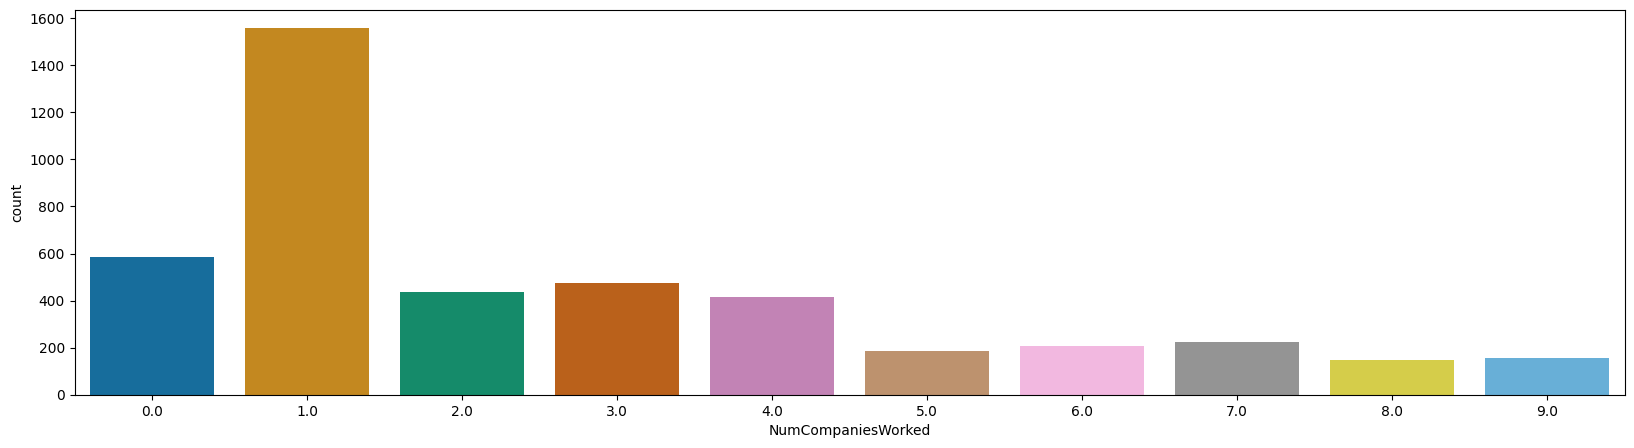

In [360]:
#check the distribution of the data
plt.figure(figsize = (20,5))
sns.countplot(x = 'NumCompaniesWorked', data = df, palette='colorblind')

In [361]:
#fill missing value in numcompaniesworked with mode i.e 1
df['NumCompaniesWorked'].fillna(1.0, inplace = True)

In [362]:
# fill missing values in EnvironmentSatisfaction with median value i.e. 3
df['EnvironmentSatisfaction'].fillna(3.0, inplace = True)

In [363]:
# fill missing values in JobSatisfaction with median value i.e. 3
df['JobSatisfaction'].fillna(3.0, inplace = True)

<Axes: xlabel='WorkLifeBalance', ylabel='count'>

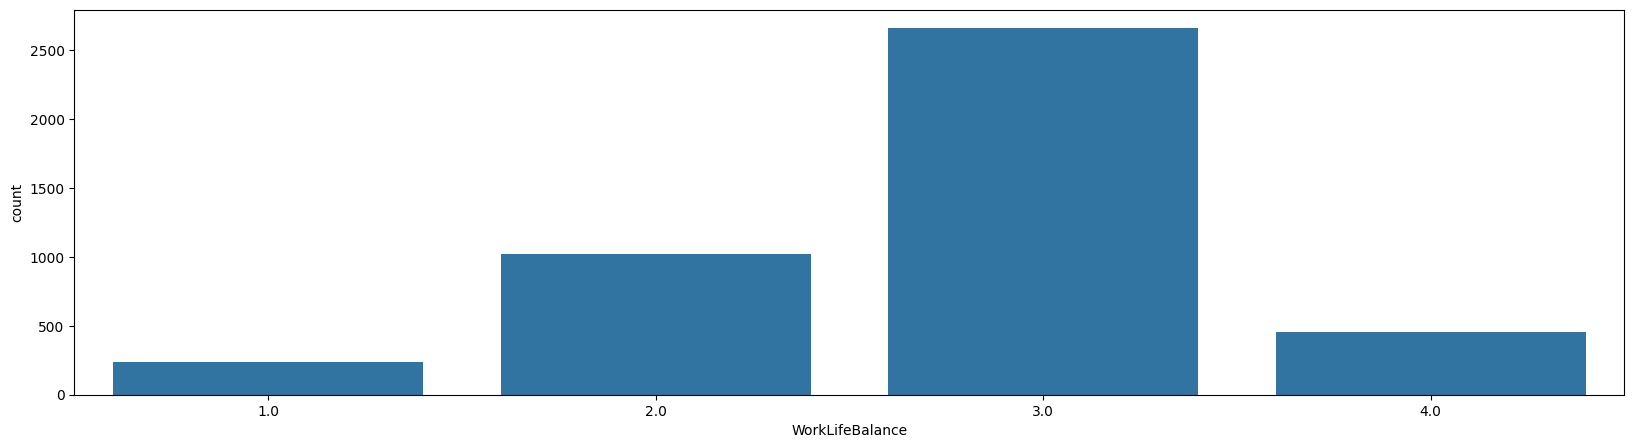

In [364]:
# check the distribution of the data
plt.figure(figsize = (20,5))
sns.countplot(x = 'WorkLifeBalance', data = df)

In [365]:
# fill missing values in JobSatisfaction with mode value i.e. 3
df['WorkLifeBalance'].fillna(3.0, inplace = True)

In [366]:
# fill missing values in JobSatisfaction with median value i.e. 10
df['TotalWorkingYears'].fillna(10.0, inplace = True)

In [367]:
df.isnull().sum().sum()

0

## **3.EDA: Skip this part at the moment**

## **4. Feature Engineering**

In [368]:
#One hot encoding using pandas.get_dummies

one_hot_var = ['BusinessTravel','Department','EducationField','JobRole','MaritalStatus']
for i in one_hot_var:
  x_t = pd.get_dummies(df[i], prefix = i, prefix_sep = '_', drop_first=True )
  df = df.join(x_t)
  df.drop(i, axis = 1, inplace = True)

In [369]:
df

,Age,Attrition,DistanceFromHome,Education,EmployeeID,Gender,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,mean_time,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,51,No,6,2,1,Female,1,131160,1.0,11,0,1.0,6,1,0,0,3,3,3.0,4.0,2.0,7.686399,False,True,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False
1,31,Yes,10,1,2,Female,1,41890,0.0,23,1,6.0,3,5,1,4,2,4,3.0,2.0,4.0,7.013240,True,False,True,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,True
2,32,No,17,4,3,Male,4,193280,1.0,15,3,5.0,2,5,0,3,3,3,2.0,2.0,1.0,7.193678,True,False,True,False,False,False,False,True,False,False,False,False,False,False,False,True,False,True,False
3,38,No,2,5,4,Male,3,83210,3.0,11,3,13.0,5,8,7,5,2,3,4.0,4.0,3.0,7.973629,False,False,True,False,True,False,False,False,False,True,False,False,False,False,False,False,False,True,False
4,32,No,10,1,5,Male,1,23420,4.0,12,2,9.0,2,6,0,4,3,3,4.0,1.0,3.0,10.750734,False,True,True,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4404,29,No,4,3,4405,Female,2,35390,1.0,18,0,6.0,2,6,1,5,2,3,3.0,4.0,3.0,8.522277,False,True,False,True,False,False,False,True,False,True,False,False,False,False,False,False,False,False,True
4405,42,No,5,4,4406,Female,1,60290,3.0,17,1,10.0,5,3,0,2,3,3,4.0,1.0,3.0,6.092954,False,True,True,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,True
4406,29,No,2,4,4407,Male,1,26790,2.0,15,0,10.0,2,3,0,2,2,3,4.0,4.0,3.0,7.706632,False,True,True,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False
4407,25,No,25,2,4408,Male,2,37020,0.0,20,0,5.0,4,4,1,2,3,4,1.0,3.0,3.0,9.492595,False,True,True,False,True,False,False,False,False,False,False,False,False,False,False,True,False,True,False


In [370]:
#To encode attrition and gender

df.Attrition = df.Attrition.apply(lambda x : 1 if x == 'Yes' else 0)
df.Gender = df.Gender.apply(lambda x : 1 if x == 'Male' else 0)

In [371]:
df

,Age,Attrition,DistanceFromHome,Education,EmployeeID,Gender,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,mean_time,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,51,0,6,2,1,0,1,131160,1.0,11,0,1.0,6,1,0,0,3,3,3.0,4.0,2.0,7.686399,False,True,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False
1,31,1,10,1,2,0,1,41890,0.0,23,1,6.0,3,5,1,4,2,4,3.0,2.0,4.0,7.013240,True,False,True,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,True
2,32,0,17,4,3,1,4,193280,1.0,15,3,5.0,2,5,0,3,3,3,2.0,2.0,1.0,7.193678,True,False,True,False,False,False,False,True,False,False,False,False,False,False,False,True,False,True,False
3,38,0,2,5,4,1,3,83210,3.0,11,3,13.0,5,8,7,5,2,3,4.0,4.0,3.0,7.973629,False,False,True,False,True,False,False,False,False,True,False,False,False,False,False,False,False,True,False
4,32,0,10,1,5,1,1,23420,4.0,12,2,9.0,2,6,0,4,3,3,4.0,1.0,3.0,10.750734,False,True,True,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4404,29,0,4,3,4405,0,2,35390,1.0,18,0,6.0,2,6,1,5,2,3,3.0,4.0,3.0,8.522277,False,True,False,True,False,False,False,True,False,True,False,False,False,False,False,False,False,False,True
4405,42,0,5,4,4406,0,1,60290,3.0,17,1,10.0,5,3,0,2,3,3,4.0,1.0,3.0,6.092954,False,True,True,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,True
4406,29,0,2,4,4407,1,1,26790,2.0,15,0,10.0,2,3,0,2,2,3,4.0,4.0,3.0,7.706632,False,True,True,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False
4407,25,0,25,2,4408,1,2,37020,0.0,20,0,5.0,4,4,1,2,3,4,1.0,3.0,3.0,9.492595,False,True,True,False,True,False,False,False,False,False,False,False,False,False,False,True,False,True,False


5. Split the data set into train and test ones

In [372]:
x = df.drop('Attrition', axis =1)
y = df['Attrition']

In [373]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, stratify = y, random_state = 42)

Check for multicollinearity

In [374]:
df_cor = x_train.copy()

In [375]:
df_cor

,Age,DistanceFromHome,Education,EmployeeID,Gender,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,mean_time,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
3205,50,5,3,3206,1,1,54730,1.0,19,1,20.0,2,20,3,8,4,3,4.0,3.0,3.0,6.752401,False,True,False,True,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False
3485,34,1,1,3486,0,2,26960,3.0,23,0,6.0,3,0,0,0,3,4,3.0,4.0,3.0,6.118382,False,False,False,True,False,True,False,False,False,False,False,False,False,True,False,False,False,True,False
3459,21,1,4,3460,1,1,57750,1.0,18,0,1.0,2,1,1,0,3,3,3.0,1.0,2.0,10.900065,False,True,True,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,True
169,60,16,3,170,0,4,23390,4.0,20,0,22.0,4,18,13,11,3,4,3.0,1.0,4.0,7.741770,True,False,True,False,True,False,False,False,False,False,True,False,False,False,False,False,False,True,False
426,40,1,4,427,1,2,192320,2.0,14,1,11.0,3,1,0,0,3,3,1.0,2.0,2.0,7.643867,False,True,True,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
743,37,20,5,744,1,2,68040,4.0,13,1,8.0,1,3,0,2,3,3,1.0,3.0,3.0,7.652767,False,True,True,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,True
2673,50,17,3,2674,1,1,173280,4.0,15,2,20.0,1,3,2,0,3,3,4.0,1.0,3.0,7.462798,False,True,True,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False
808,33,7,2,809,1,2,37370,8.0,22,2,8.0,2,5,0,2,3,4,1.0,2.0,3.0,10.849713,False,True,True,False,True,False,False,False,False,False,False,False,False,False,True,False,False,True,False
578,29,6,3,579,1,1,22440,1.0,12,3,11.0,5,11,3,10,1,3,4.0,1.0,1.0,6.685801,False,True,True,False,True,False,False,False,False,False,False,False,False,False,False,True,False,True,False


In [376]:
df_cor.corr()

,Age,DistanceFromHome,Education,EmployeeID,Gender,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,mean_time,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
Age,1.000000,0.017233,-0.042667,0.018842,-0.043536,-0.002375,-0.042729,0.303149,-0.030693,-0.040041,0.686033,-0.038836,0.306083,0.206807,0.193039,0.024455,-0.019772,0.015087,0.001100,-0.019333,2.621200e-02,-0.021434,0.025445,1.767836e-02,-0.015456,-0.013817,-0.036655,0.019054,0.001505,0.050161,0.016848,0.024179,0.007018,0.002905,-0.006724,0.001916,0.020543,-0.028689,0.074253,-0.110888
DistanceFromHome,0.017233,1.000000,-0.007500,0.011541,-0.061141,-0.042704,-0.015253,-0.014232,0.040430,0.027703,0.006253,-0.006120,0.031296,0.015851,0.017910,-0.013370,0.035530,0.026970,-0.013263,0.014956,-3.205595e-03,-0.004541,0.018961,1.114649e-02,0.001880,0.012118,0.007641,-0.011147,-0.018583,-0.010765,0.005217,0.061466,-0.047246,0.011637,-0.008145,-0.013297,-0.011382,0.015427,0.046572,-0.051477
Education,-0.042667,-0.007500,1.000000,-0.018846,-0.023882,0.034353,0.004966,-0.016083,-0.044946,0.002787,-0.009873,0.017871,0.011174,0.031014,0.012885,-0.021438,-0.040554,-0.052039,-0.002931,-0.011957,8.868496e-03,0.008098,-0.005264,-9.855757e-03,0.006714,0.006942,-0.006515,-0.025802,0.052880,0.006387,0.051191,-0.083644,0.038912,-0.007496,0.048240,-0.001842,0.009067,0.033643,0.005405,0.017010
EmployeeID,0.018842,0.011541,-0.018846,1.000000,-0.025954,0.006898,0.006003,0.003934,0.002599,-0.024054,0.005675,0.002176,0.001160,-0.000402,0.003711,0.007627,-0.006151,-0.005244,-0.003426,-0.002357,-1.379977e-02,-0.006201,-0.002510,-4.538577e-03,-0.007189,-0.000025,-0.010044,-0.002848,-0.007039,0.010647,-0.007726,0.003640,-0.003691,0.002719,0.009992,-0.006081,-0.009031,0.018286,0.000526,0.014734
Gender,-0.043536,-0.061141,-0.023882,-0.025954,1.000000,-0.033733,0.007537,-0.065176,0.011734,0.019522,-0.033498,-0.032958,-0.018681,-0.022177,-0.003412,0.029926,0.057639,-0.029768,0.019700,-0.023481,-1.393030e-02,-0.001649,-0.030724,-1.168091e-02,0.002764,0.004541,0.002828,-0.032964,0.012404,0.014572,-0.003054,0.017701,-0.042746,-0.019838,0.003453,0.035823,-0.000360,-0.011722,-0.026496,0.008731
JobLevel,-0.002375,-0.042704,0.034353,0.006898,-0.033733,1.000000,0.032995,-0.020669,0.008022,-0.004077,-0.033349,-0.015899,-0.061833,-0.058667,-0.051551,-0.009785,0.001572,-0.022020,-0.018367,-0.013791,1.615017e-02,-0.016006,0.037655,-4.232143e-02,0.032595,0.016020,0.038980,-0.039191,-0.007247,-0.001205,0.026371,-0.032919,0.026216,-0.008405,0.023922,0.011893,-0.011729,-0.027209,0.009575,-0.023260
MonthlyIncome,-0.042729,-0.015253,0.004966,0.006003,0.007537,0.032995,1.000000,-0.021881,0.003781,0.024503,-0.029305,0.057715,-0.007253,0.055084,0.024262,0.030811,0.016664,-0.004383,0.004502,0.001915,1.404622e-02,-0.028717,-0.026787,6.023171e-02,-0.045641,0.012963,-0.052850,0.028074,-0.002758,0.002128,-0.025267,0.023774,-0.019867,0.021494,0.001386,0.007018,0.004586,-0.008090,0.023507,-0.049285
NumCompaniesWorked,0.303149,-0.014232,-0.016083,0.003934,-0.065176,-0.020669,-0.021881,1.000000,0.017823,0.016251,0.240736,-0.032531,-0.118918,-0.037147,-0.117066,0.034846,0.013164,0.030630,-0.055429,-0.025510,-5.980096e-04,-0.049917,0.036145,4.209877e-02,-0.018568,0.003997,0.012033,-0.015059,0.003322,0.019364,0.041260,0.009009,-0.003195,0.009303,0.005531,-0.022770,-0.022069,-0.006859,-0.01361

<Axes: >

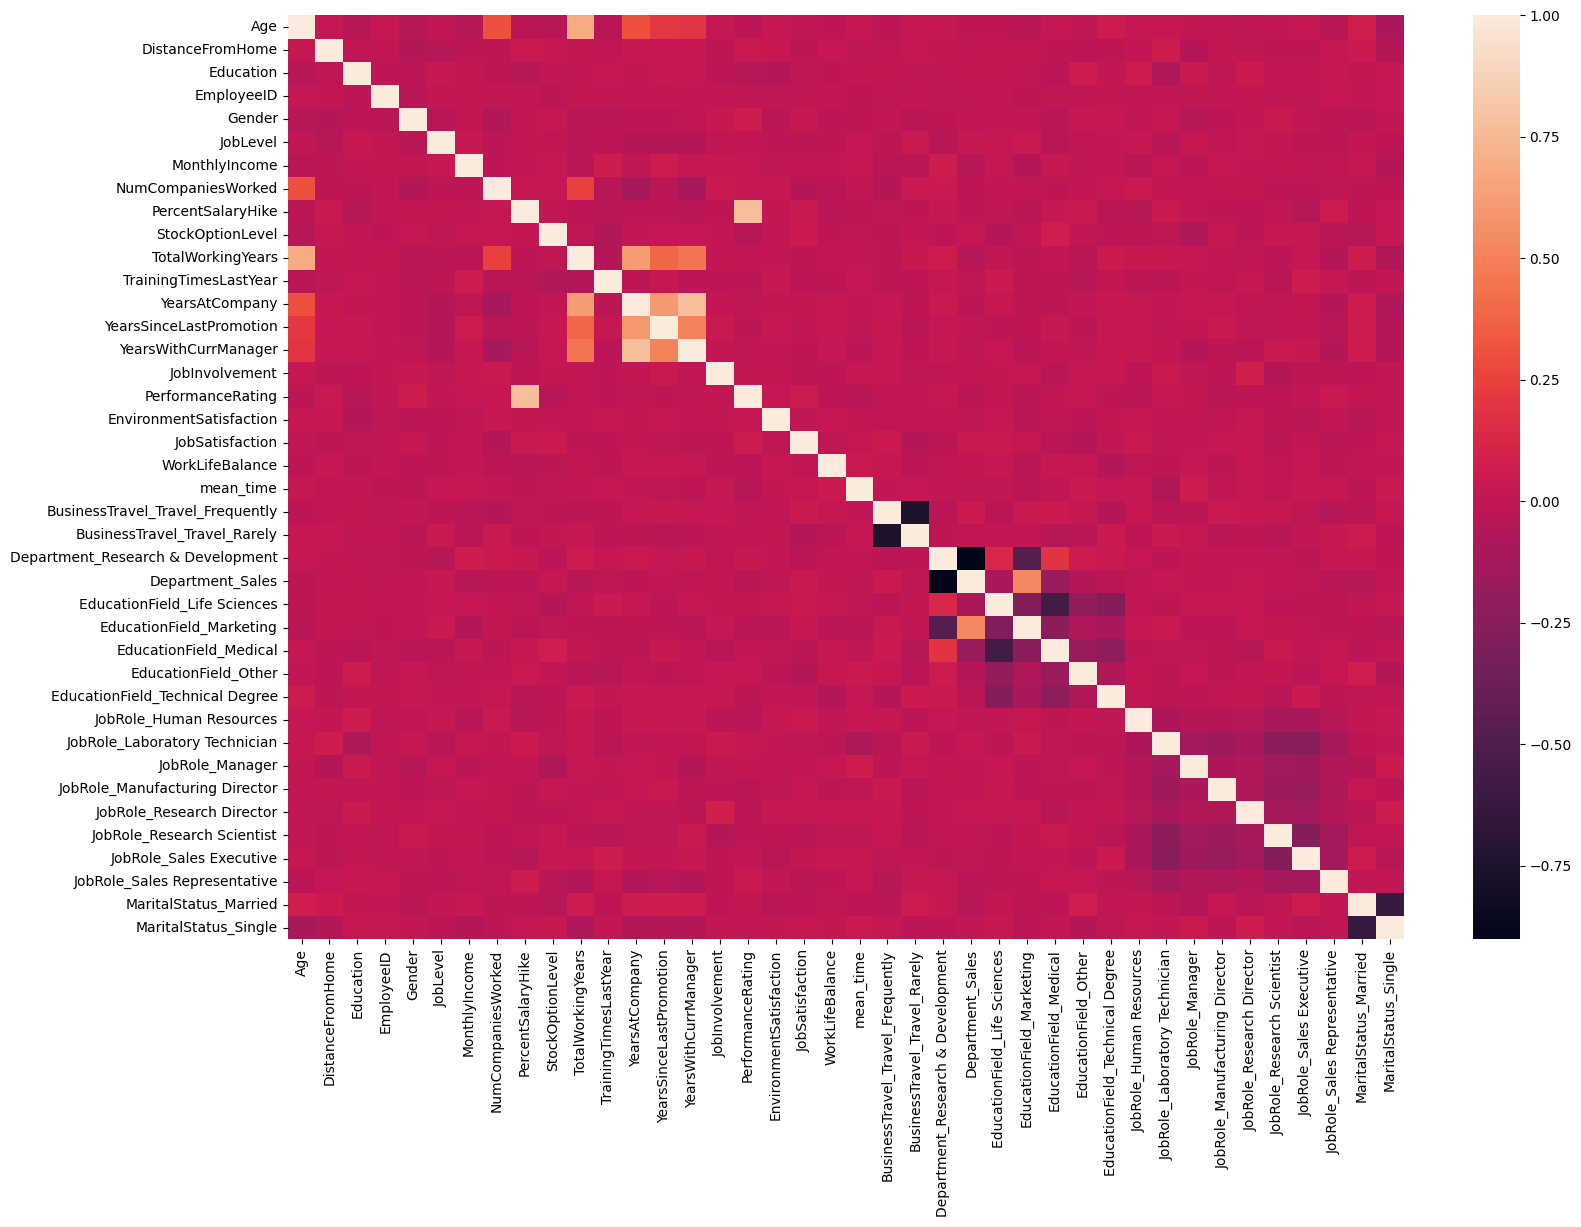

In [377]:
plt.figure(figsize = (18,12))
sns.heatmap(df_cor.corr())

<Axes: >

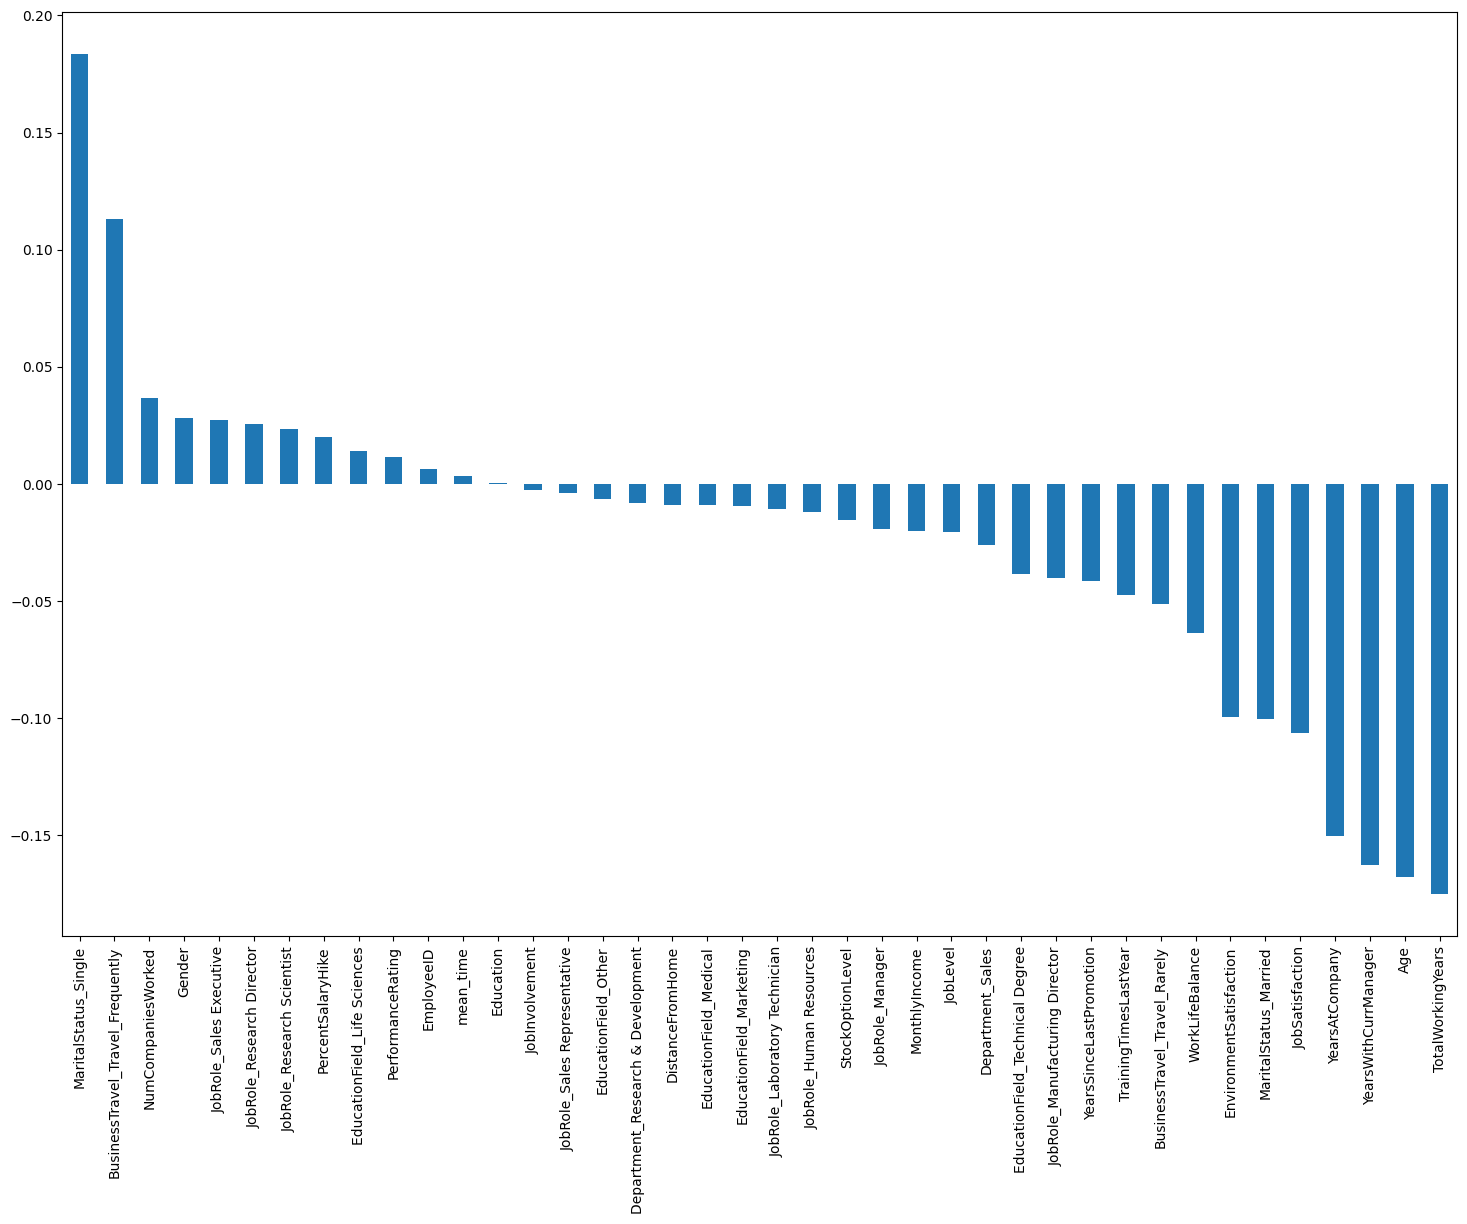

In [378]:
df_cor['Attrition'] = y_train
plt.figure(figsize = (18,12))
df_cor.corr()['Attrition'].sort_values(ascending = False)[1:].plot(kind = 'bar')

In [379]:
#checking for high multicollinearity between features

df_corr = df_cor.corr()
for i in range(df_corr.shape[0]):
  for j in range(df_corr.shape[1]):
    if(abs(df_corr.iloc[i,j]) > 0.75) &  (abs(df_corr.iloc[i,j]) != 1):
      print(round(df_corr.iloc[i,j], 3), df_corr.columns[j], '&', df_corr.index[i])

0.775 PerformanceRating & PercentSalaryHike
0.771 YearsWithCurrManager & YearsAtCompany
0.771 YearsAtCompany & YearsWithCurrManager
0.775 PercentSalaryHike & PerformanceRating
-0.754 BusinessTravel_Travel_Rarely & BusinessTravel_Travel_Frequently
-0.754 BusinessTravel_Travel_Frequently & BusinessTravel_Travel_Rarely
-0.901 Department_Sales & Department_Research & Development
-0.901 Department_Research & Development & Department_Sales


In [380]:
# I've decided to delete a few features such as Departmetn_Sales, Department_Research & Development, and BusinessTravel_Travel_Rarely considering less impact on attrition.
x_train.drop('Department_Sales', axis = 1, inplace = True)
x_test.drop('Department_Sales', axis = 1, inplace = True)
x_train.drop('Department_Research & Development', axis = 1, inplace = True)
x_test.drop('Department_Research & Development', axis = 1, inplace = True)
x_train.drop('BusinessTravel_Travel_Rarely', axis = 1, inplace = True)
x_test.drop('BusinessTravel_Travel_Rarely', axis = 1, inplace = True)

## **5. Logistic Regression**

In [381]:
# Train the logistic regression model
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

In [382]:
# Check out the score of the train set
lr.score(x_train, y_train)

0.8386730932804083

In [383]:
# It seems that the model is underfitting the training data
# Check out the score of the test set
lr.score(x_test, y_test)

0.8390022675736961

## **6. Stochastic Gradient Descent**

Let's try to enhace the score by using SGD Classifier.

In [384]:
# Standardize data in training and test datasets by using StandardScaler()
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(x_train)
train_scaled = ss.transform(x_train)
test_scaled = ss.transform(x_test)

In [385]:
# Stochastic Gradient Descent Classifier
from sklearn.linear_model import SGDClassifier
sc = SGDClassifier(loss='log', max_iter=10, random_state=42)
sc.fit(train_scaled, y_train)
print(sc.score(train_scaled, y_train))
print(sc.score(test_scaled, y_test))

0.8069180606747944
0.7913832199546486


In [386]:
# Add one more epoch into the previous ones
# Scores would be improved
sc.partial_fit(train_scaled, y_train)
print(sc.score(train_scaled, y_train))
print(sc.score(test_scaled, y_test))

0.8125886022115112
0.8061224489795918


Draw overfitting / underfitting plots in accordance with the variation of epoch

In [387]:
# First of all, we need to create empty lists for train and test datasets
# Classes are only two
import numpy as np
sc = SGDClassifier(loss='log', random_state=42)
train_score = []
test_score = []
classes = np.unique(y_train)

In [388]:
# Reiterate training during 300 epochs
for _ in range(0,300):
  sc.partial_fit(train_scaled, y_train, classes=classes)
  train_score.append(sc.score(train_scaled, y_train))
  test_score.append(sc.score(test_scaled, y_test))

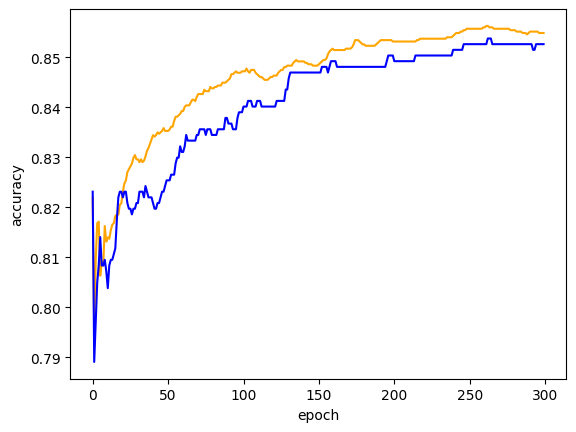

In [390]:
# Draw plots with scores of training and test datasets during 300 epochs
import matplotlib.pyplot as plt
plt.plot(train_score, c='orange')
plt.plot(test_score, c='blue')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

# Additional amendment
# 1. Adding the argement of 'stratify=y' when spliting the dataset into train and test ones.
# 2. Excluding unnecessary features like department and business_travel_rarely

In [398]:
# It seems that the most appropriate number of epoch is 252
# Train the modoel with 'max_iter=252'
sc = SGDClassifier(loss='log', max_iter=252, tol=None, random_state=42)
sc.fit(train_scaled, y_train)
print(sc.score(train_scaled, y_train))
print(sc.score(test_scaled, y_test))

0.8525659200453644
0.8560090702947846
